# New plots in preparation for paper

* There appears to be no correlation between the radio properties of our sample and eddington ratio in any sense

* Radio flux/luminosity is roughly correlated with bolometric luminosity and absolute magnitudes $M_i(z=2)$

* Loosely speaking, the median black hole mass is higher for our detections than our non-detections.  The median BH mass is also slightly higher for RL detections than RQ detections.

* The 1d fit of our data in $C_{IV}$ space does not tell us much, other than both detections and non-detections span the fit uniformly.  RQ  and RL detections also uniformly span the fit.

* $\alpha_{ro}$ as a radio-loudness indicator results in stronger correlations between radio and optical properties--possibly due to it depending on optical properties as well..?

Main takeaway:  It is difficult to really find any trends between our observed radio properties of our targets and their optical properties.  However, when analyzing our RQ and RL detections separately, there is an apparent change in behavior nearby the radio-loudness boundary (which is determined by the peak luminosity of rapidly star forming galaxies), possibly backing the idea of more than one process driving the emission in each subsample.  Either way, after sifting through our data again for trends, it's clear that we could benefit from more/further observations to really discern anything meaningful about our sample. 

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import astropy
from astropy.io import fits
from astropy.table import Table
import richardsplot
import sklearn
import sys
%matplotlib inline

In [69]:
infile = 'SpringFinalFigs_moreParams.csv'
df = pd.read_csv(infile)
print(df.head())

   col1                     name   RMS  redshift_1       W1       W2       W3  \
0   233  SDSSJ001342.45-002412.6   NaN    1.650561  0.02732  0.02415  0.02630   
1   293  SDSSJ014023.83+141151.7   NaN    1.650361  0.01581  0.04727  0.00394   
2  1270  SDSSJ014658.21-091505.2  10.0    1.650855  0.02277  0.03147  0.02065   
3  1281  SDSSJ015720.27-093809.1  23.7    1.650784  0.03413  0.02012  0.01647   
4  7944  SDSSJ081656.84+492438.1   9.3    1.650785  0.04669  0.00080  0.03072   

        W4       W5       W6     ...      LOGBH_MGII_VO09_ERR  LOGBH_MGII_S10  \
0  0.01611 -0.00745 -0.00511     ...                 0.076692        9.336939   
1  0.03844  0.00287  0.00015     ...                 0.057456        9.606281   
2  0.02196 -0.00505  0.00193     ...                 0.275801        9.510254   
3  0.03683  0.00067 -0.00521     ...                 0.081300        8.959515   
4  0.02102 -0.00724 -0.00474     ...                 0.107863        8.727050   

   LOGBH_MGII_S10_ERR  LOG

In [70]:
infile2 = 'ICA/spring_ICA_weights.csv'
df2 = pd.read_csv(infile2)

X = np.array(df2)[:,1:] #format weights for t-SNE
print(X.shape)

#10 weights for this set of objects
W1 = X[:,0]
W2 = X[:,1]
W3 = X[:,2]
W4 = X[:,3]
W5 = X[:,4]
W6 = X[:,5]
W7 = X[:,6]
W8 = X[:,7]
W9 = X[:,8]
W10 = X[:,9]

(42, 10)


In [71]:
# t-SNE
from sklearn.manifold import TSNE
tsne2 = TSNE(n_components = 2)
projTSNE2 = tsne2.fit_transform(X)

print(projTSNE2)

[[-21.573488    42.390923  ]
 [-23.478054   -73.00952   ]
 [ 44.319675     1.1488291 ]
 [ 69.22125      8.852759  ]
 [ -3.750581    -1.3377724 ]
 [ 12.918684    51.32054   ]
 [-12.655905    17.146704  ]
 [-90.416      -12.765315  ]
 [ 98.01135     -0.68999296]
 [-41.133728   -58.395004  ]
 [-33.57647     20.83969   ]
 [ 19.898767    -0.36988616]
 [  8.467147    15.727751  ]
 [-26.74906     -1.1815933 ]
 [-13.248572   -19.2366    ]
 [ 54.01646    -17.013445  ]
 [ 56.71625    -39.783184  ]
 [ 29.33042     17.752344  ]
 [-71.49948     13.02665   ]
 [-33.17411    -37.31561   ]
 [ 75.652336   -10.671254  ]
 [-51.17401     -0.43907633]
 [-58.118004   -39.832684  ]
 [ 27.369465   -38.189312  ]
 [ 10.600364   -17.805387  ]
 [ -2.5094814   34.406033  ]
 [-65.614685   -60.458553  ]
 [-67.70967    -19.911028  ]
 [ 66.74969     37.297108  ]
 [ -3.6362755   61.61427   ]
 [-82.187294   -44.836678  ]
 [ 36.976112    70.04954   ]
 [ 34.519123    45.995686  ]
 [ 67.957535    65.87753   ]
 [-15.198469  

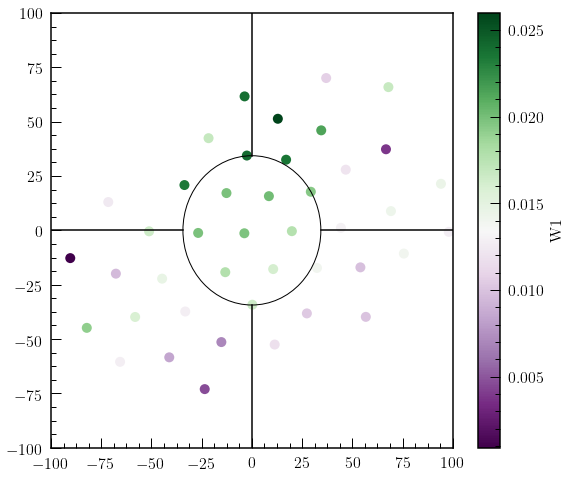

In [200]:
plt.figure(figsize=(9,8))
plt.scatter(projTSNE2[:,0], projTSNE2[:,1], c=W1, s=100, cmap="PRGn", edgecolor="None")
cb = plt.colorbar()
cb.ax.set_ylabel("W1")
plt.xlim(-100,100)
plt.ylim(-100,100)

# Find radius of circle containing 20% of the sources and plot
x0 = 0 #take center of circle to be 0,0
y0 = 0
x  = projTSNE2[:,0]
y  = projTSNE2[:,1]
# Find radial coordinate of each point
r  = np.sqrt((x - x0)**2 + (y - y0)**2)
t  = 20 # percent
# Find radius that corresponds to t percentile
r0 = np.percentile(r, t)

circle=plt.Circle((0, 0), r0, color='k', fill=False)
fig = plt.gcf()
fig.gca().add_artist(circle)

plt.plot([0,0], [r0,100], c='k')
plt.plot([0,0], [-r0,-100], c='k')
plt.plot([r0,100], [0,0], c='k')
plt.plot([-r0,-100], [0,0], c='k')

Can't really do anything meaningful with this analysis with current data.  Could be more effective if:

* Had all three sets of eigenvalues to compare all of our objects in the same context (above is only based on the 42 objects whose regular EW fit was deemed best)

* Gordon - did you say that ICA reconstructions were done for all of the dr12 spectra?  If the weights that were used for those are available somewhere, we could do a more complete t-SNE analysis with the new weights (if that is something worth doing)

Edit:  Actually, does it make sense to do the same analysis with our new ICA weights?  I know we chose our sample using the old (6-component) ICA weights to show they spanned our space uniformly, but is it OK for us to test how our objects move around the newly-defined space, since the original analysis just showed the uniformity of our sample?

-------

#### Try testing out some parameters:

In [221]:
#Parameters to test
uniform = df[['UNI_FLAG']].values
Miz2 = df[['MI_Z2']].values
det = df[['detection']].values
peak_flux = df[['peak_flux']].values
int_flux = np.log10(df[['int_flux']].values)
logL_rad = df[['L_rad']].values
aro = df[['alpha_ro']].values
ew_civ = df[['EW_CIV_2']].values
voff_civ = df[['VOFF_CIV_PEAK_2']].values
log_bh = df[['LOGBH']].values
logedd_ratio = df[['LOGEDD_RATIO']].values
logL_bol = df[['LOGLBOL']].values
logL_civ = df[['LOGL_CIV']].values
fwhm_civ = df[['FWHM_CIV']].values

duni = (det>0)&(uniform>0)
nduni = (det<0)&(uniform>0)
dnuni = (det>0)&(uniform==0)
ndnuni = (det<0)&(uniform==0)

Num Detections     = 22
Num Non-Detections = 28


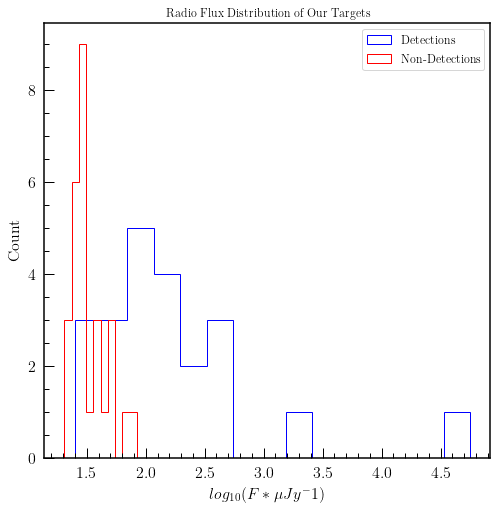

In [284]:
plt.figure(figsize=(8,8))
plt.hist(int_flux[(det>0)], color='b', histtype='step', bins=15, label='Detections')
plt.hist(int_flux[det<0], color='r', histtype='step', label='Non-Detections')
plt.xlabel('$log_{10} (F * {\mu Jy}^-1)$')
plt.ylabel('Count')
plt.title('Radio Flux Distribution of Our Targets')
plt.legend(loc="best")

print("Num Detections     =", (det>0).sum())
print("Num Non-Detections =", (det<0).sum())
#plt.savefig("Graphs/radioflux_distribution.png")

* Two of our objects are FIRST detections and are significantly brighter than the rest of the sample

---

### Demographics of our sample

Text(0.5, 0.98, 'Sample Demographics')

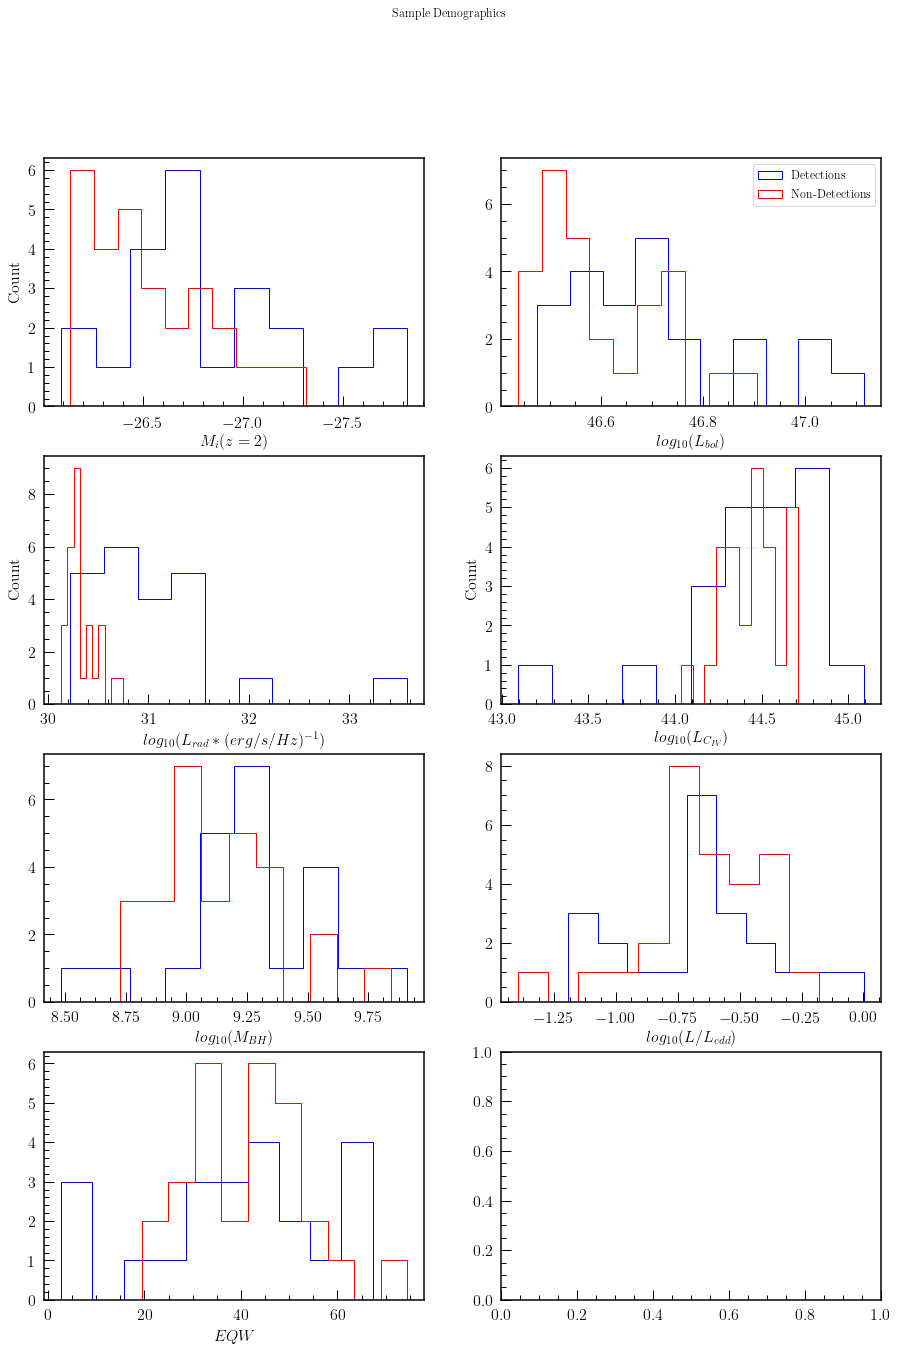

In [301]:
fig, axs = plt.subplots(4, 2, figsize=(15,21))

axs[0,0].hist(Miz2[det>0], color='b', histtype='step')
axs[0,0].hist(Miz2[det<0], color='r', histtype='step')
axs[0,0].set_xlabel('$M_i(z=2)$')
axs[0,0].invert_xaxis()
axs[0,0].set_ylabel('Count')

axs[0,1].hist(logL_bol[det>0], color='b', histtype='step', label="Detections")
axs[0,1].hist(logL_bol[det<0], color='r', histtype='step', label="Non-Detections")
axs[0,1].set_xlabel('$log_{10} (L_{bol})$')
axs[0,1].legend(loc="best")

axs[1,0].hist(logL_rad[det>0], color='b', histtype='step')
axs[1,0].hist(logL_rad[det<0], color='r', histtype='step')
axs[1,0].set_xlabel('$log_{10} (L_{rad} * (erg/s/Hz)^{-1})$')
axs[1,0].set_ylabel('Count')

axs[1,1].hist(logL_civ[det>0], color='b', histtype='step')
axs[1,1].hist(logL_civ[det<0], color='r', histtype='step')
axs[1,1].set_xlabel('$log_{10} (L_{C_{IV}})$')
axs[1,1].set_ylabel('Count')

axs[2,0].hist(log_bh[det>0], color='b', histtype='step')
axs[2,0].hist(log_bh[det<0], color='r', histtype='step')
axs[2,0].set_xlabel('$log_{10} (M_{BH})$')

axs[2,1].hist(logedd_ratio[det>0], color='b', histtype='step')
axs[2,1].hist(logedd_ratio[det<0], color='r', histtype='step')
axs[2,1].set_xlabel('$log_{10} (L / L_{edd})$')

axs[3,0].hist(ew_civ[det>0], color='b', histtype='step')
axs[3,0].hist(ew_civ[det<0], color='r', histtype='step')
axs[3,0].set_xlabel('$EQW$')

plt.suptitle("Sample Demographics")
#plt.savefig("Graphs/demographics.png")

* What are the units for log_bh ($M_{BH}$?) and L_bol?

--------

### $log(M_{BH}), log(L/L_{edd}), M_i(z=2), log(L_{bol})$ related to radio properties

Reminder: $\alpha_{ro}$ is calculated using the following equation from Eq. 4 of Stone & Richards 2019:

 $\alpha_{ro} = \frac{log(L_{20cm}/L_{2500Å})}{log(20cm / 2500Å)}$

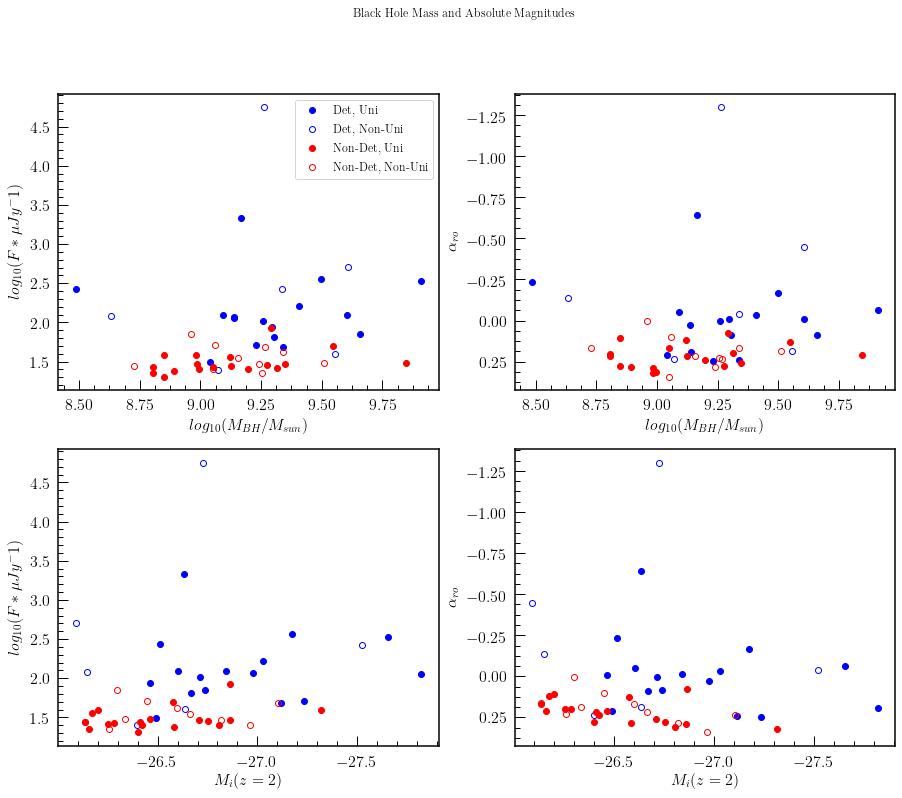

In [290]:
fig, axs = plt.subplots(2, 2, figsize=(15,12))

axs[0,0].plot(log_bh[duni], int_flux[duni],'bo', label="Det, Uni")
axs[0,0].plot(log_bh[dnuni], int_flux[dnuni],'bo', markerfacecolor="None", label="Det, Non-Uni")
axs[0,0].plot(log_bh[nduni], int_flux[nduni],'ro', label="Non-Det, Uni")
axs[0,0].plot(log_bh[ndnuni], int_flux[ndnuni],'ro', markerfacecolor="None", label="Non-Det, Non-Uni")
#axs[0,0].set_ylim(1,3)
axs[0,0].set_xlabel("$log_{10} (M_{BH} / M_{sun})$")
axs[0,0].set_ylabel('$log_{10} (F * {\mu Jy}^-1)$')
axs[0,0].legend(loc="best")

axs[0,1].plot(log_bh[duni], aro[duni], 'bo')
axs[0,1].plot(log_bh[dnuni], aro[dnuni], 'bo', markerfacecolor="None")
axs[0,1].plot(log_bh[nduni], aro[nduni], 'ro')
axs[0,1].plot(log_bh[ndnuni], aro[ndnuni], 'ro', markerfacecolor="None")
axs[0,1].set_xlabel("$log_{10} (M_{BH} / M_{sun})$")
axs[0,1].set_ylabel('$\\alpha_{ro}$')
axs[0,1].invert_yaxis()

axs[1,0].plot(Miz2[duni], int_flux[duni], 'bo')
axs[1,0].plot(Miz2[dnuni], int_flux[dnuni], 'bo', markerfacecolor="None")
axs[1,0].plot(Miz2[nduni], int_flux[nduni], 'ro')
axs[1,0].plot(Miz2[ndnuni], int_flux[ndnuni], 'ro', markerfacecolor="None")
axs[1,0].set_xlabel("$M_i(z=2)$")
axs[1,0].set_ylabel('$log_{10} (F * {\mu Jy}^-1)$')
axs[1,0].invert_xaxis()

axs[1,1].plot(Miz2[duni], aro[duni], 'bo')
axs[1,1].plot(Miz2[dnuni], aro[dnuni], 'bo', markerfacecolor="None")
axs[1,1].plot(Miz2[nduni], aro[nduni], 'ro')
axs[1,1].plot(Miz2[ndnuni], aro[ndnuni], 'ro', markerfacecolor="None")
axs[1,1].set_xlabel("$M_i(z=2)$")
axs[1,1].set_ylabel('$\\alpha_{ro}$')
axs[1,1].invert_xaxis()
axs[1,1].invert_yaxis()

plt.suptitle("Black Hole Mass and Absolute Magnitudes")
#plt.savefig("Graphs/radio_vs_bhmass_and_mag.png")

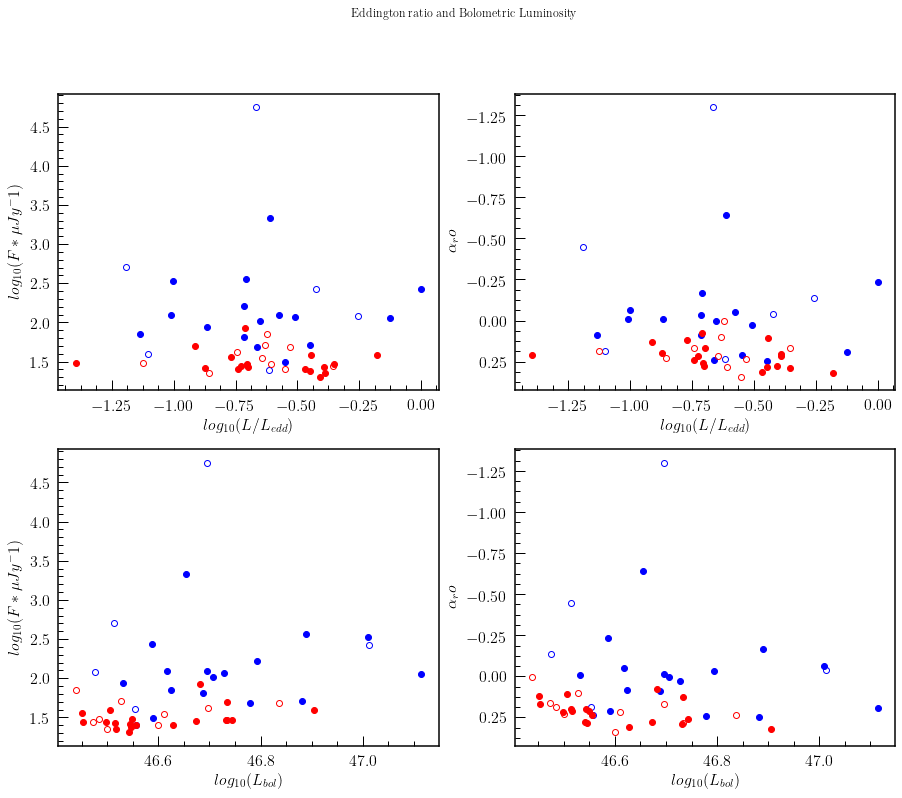

In [289]:
fig, axs = plt.subplots(2, 2, figsize=(15,12))

axs[0,0].plot(logedd_ratio[duni], int_flux[duni], 'bo')
axs[0,0].plot(logedd_ratio[dnuni], int_flux[dnuni], 'bo', markerfacecolor="None")
axs[0,0].plot(logedd_ratio[nduni], int_flux[nduni], 'ro')
axs[0,0].plot(logedd_ratio[ndnuni], int_flux[ndnuni], 'ro', markerfacecolor="None")
axs[0,0].set_xlabel("$log_{10} (L / L_{edd})$")
axs[0,0].set_ylabel('$log_{10} (F * {\mu Jy}^-1)$')

axs[0,1].plot(logedd_ratio[duni], aro[duni], 'bo')
axs[0,1].plot(logedd_ratio[dnuni], aro[dnuni], 'bo', markerfacecolor="None")
axs[0,1].plot(logedd_ratio[nduni], aro[nduni], 'ro')
axs[0,1].plot(logedd_ratio[ndnuni], aro[ndnuni], 'ro', markerfacecolor="None")
axs[0,1].set_xlabel("$log_{10} (L / L_{edd})$")
axs[0,1].set_ylabel('$\\alpha_ro$')
axs[0,1].invert_yaxis()

axs[1,0].plot(logL_bol[duni], int_flux[duni], 'bo')
axs[1,0].plot(logL_bol[dnuni], int_flux[dnuni], 'bo', markerfacecolor="None")
axs[1,0].plot(logL_bol[nduni], int_flux[nduni], 'ro')
axs[1,0].plot(logL_bol[ndnuni], int_flux[ndnuni], 'ro', markerfacecolor="None")
axs[1,0].set_xlabel("$log_{10} (L_{bol})$")
axs[1,0].set_ylabel('$log_{10} (F * {\mu Jy}^-1)$')

axs[1,1].plot(logL_bol[duni], aro[duni], 'bo')
axs[1,1].plot(logL_bol[dnuni], aro[dnuni], 'bo', markerfacecolor="None")
axs[1,1].plot(logL_bol[nduni], aro[nduni], 'ro')
axs[1,1].plot(logL_bol[ndnuni], aro[ndnuni], 'ro', markerfacecolor="None")
axs[1,1].set_xlabel("$log_{10} (L_{bol})$")
axs[1,1].set_ylabel('$\\alpha_ro$')
axs[1,1].invert_yaxis()

plt.suptitle("Eddington ratio and Bolometric Luminosity")
#plt.savefig("Graphs/radio_vs_eddratio_and_Lbol.png")

---
### $C_{IV}$, EQW, Blueshift Analysis

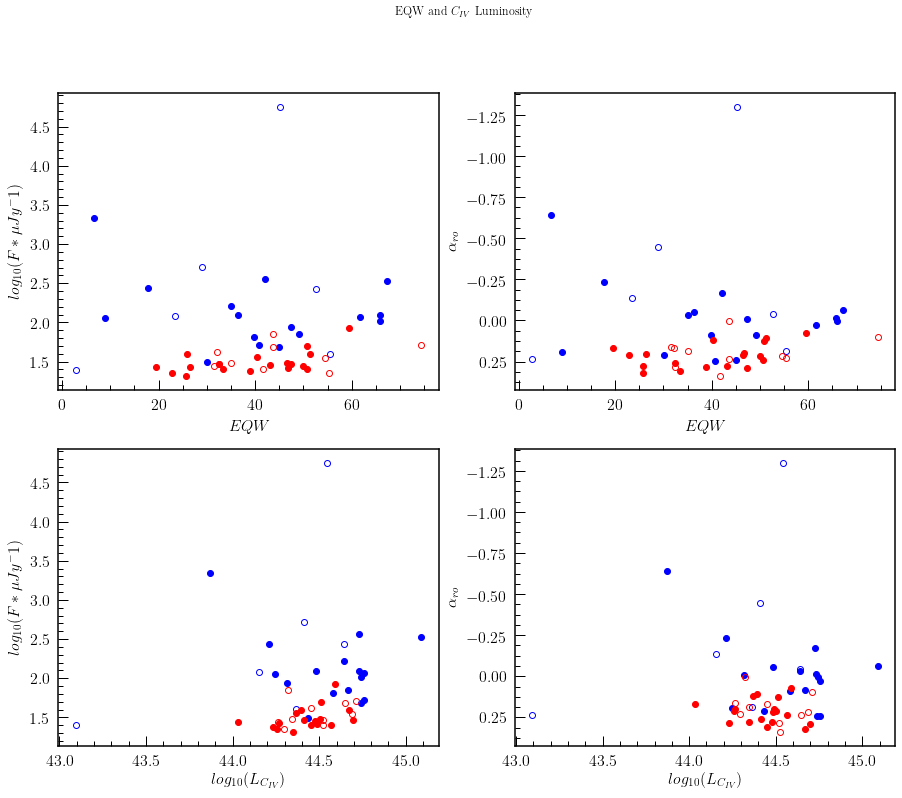

In [293]:
fig, axs = plt.subplots(2, 2, figsize=(15,12))

axs[0,0].plot(ew_civ[duni], int_flux[duni], 'bo')
axs[0,0].plot(ew_civ[dnuni], int_flux[dnuni], 'bo', markerfacecolor="None")
axs[0,0].plot(ew_civ[nduni], int_flux[nduni], 'ro')
axs[0,0].plot(ew_civ[ndnuni], int_flux[ndnuni], 'ro', markerfacecolor="None")
axs[0,0].set_xlabel("$EQW$")
axs[0,0].set_ylabel('$log_{10} (F * {\mu Jy}^-1)$')

axs[0,1].plot(ew_civ[duni], aro[duni], 'bo')
axs[0,1].plot(ew_civ[dnuni], aro[dnuni], 'bo', markerfacecolor="None")
axs[0,1].plot(ew_civ[nduni], aro[nduni], 'ro')
axs[0,1].plot(ew_civ[ndnuni], aro[ndnuni], 'ro', markerfacecolor="None")
axs[0,1].set_xlabel("$EQW$")
axs[0,1].set_ylabel('$\\alpha_{ro}$')
axs[0,1].invert_yaxis()

axs[1,0].plot(logL_civ[duni], int_flux[duni], 'bo')
axs[1,0].plot(logL_civ[dnuni], int_flux[dnuni], 'bo', markerfacecolor="None")
axs[1,0].plot(logL_civ[nduni], int_flux[nduni], 'ro')
axs[1,0].plot(logL_civ[ndnuni], int_flux[ndnuni], 'ro', markerfacecolor="None")
axs[1,0].set_xlabel("$log_{10} (L_{C_{IV}})$")
axs[1,0].set_ylabel('$log_{10} (F * {\mu Jy}^-1)$')

axs[1,1].plot(logL_civ[duni], aro[duni], 'bo')
axs[1,1].plot(logL_civ[dnuni], aro[dnuni], 'bo', markerfacecolor="None")
axs[1,1].plot(logL_civ[nduni], aro[nduni], 'ro')
axs[1,1].plot(logL_civ[ndnuni], aro[ndnuni], 'ro', markerfacecolor="None")
axs[1,1].set_xlabel("$log_{10} (L_{C_{IV}})$")
axs[1,1].set_ylabel('$\\alpha_{ro}$')
axs[1,1].invert_yaxis()

plt.suptitle("EQW and $C_{IV}$ Luminosity")
#plt.savefig("Graphs/radio_vs_Lciv_and_eqw.png")

---
#### 1d analysis in $C_{IV}$ space

(0, 2)


Text(0.5, 1.0, '1d Fit of our Data in $C_{IV}-Space$')

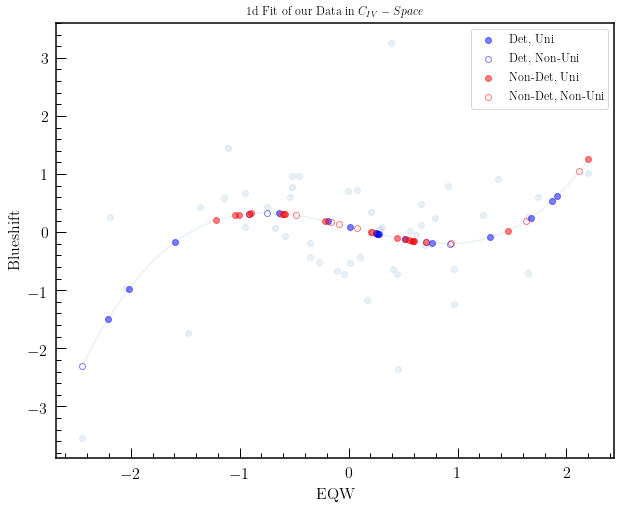

In [297]:
from sklearn.preprocessing import scale

Xsort = df[['EW_CIV_2','VOFF_CIV_PEAK_2']].values

x = scale(Xsort[:,0])
y = scale(Xsort[:,1])
z = np.arange(min(x),max(x),0.001)
fit = np.poly1d(np.polyfit(x,y,3))

#Now manually do the 1-d fit for the cubic line
cubefit = np.array([z, fit(z)]).T
data = np.array([x, y]).T

trevorFit = np.array([]).reshape(0, 2)
print(trevorFit.shape)

#Want to loop through each point of the cubic fit
#for each data point, saving the distance between the two
#in delta.  Then take the index of the min in delta and
#plot that index of the cubic fit to display the 1d distribution
for scat in data: 
    r = np.sqrt((scat[0]-cubefit[:,0])**2 + (scat[1]-cubefit[:,1])**2)
    delta = np.array([cubefit[np.argmin(r), 0], cubefit[np.argmin(r), 1]])
    trevorFit = np.concatenate((trevorFit, np.atleast_2d(delta)))

fitx = np.reshape(trevorFit[:,0], (50,1))
fity = np.reshape(trevorFit[:,1], (50,1))

fill = 0.5
plt.figure(figsize=(10,8))
plt.scatter(x, y, alpha=0.1)
plt.plot(fitx[duni], fity[duni], 'bo', label="Det, Uni", alpha=fill)
plt.plot(fitx[dnuni], fity[dnuni], 'bo', label="Det, Non-Uni", markerfacecolor="None", alpha=fill)
plt.plot(fitx[nduni], fity[nduni], 'ro', label="Non-Det, Uni", alpha=fill)
plt.plot(fitx[ndnuni], fity[ndnuni], 'ro', label="Non-Det, Non-Uni", markerfacecolor="None", alpha=fill)
plt.plot(z, fit(z), alpha=0.1)
plt.xlabel('EQW')
plt.ylabel('Blueshift')
plt.legend(loc="best")

plt.title("1d Fit of our Data in $C_{IV}-Space$")
#plt.savefig("Graphs/civ_1dfit.png")

---
## Now display same trends comparing only detections, based on whether or not they are radio loud

In [345]:
#Can change radio-loudness indicator below:

#Flux/Luminosity as RL parameter
RQ = ((10.**int_flux)<229)&(det>0) #229µJy = 10^23.3 W/Hz, which is radio-loud using 
RL = ((10.**int_flux)>229)&(det>0)

##alpha_ro as RL parameter
#RQ = (aro>-0.2)&(det>0) #alpha_ro<-0.2 is radio-loud 
#RL = (aro<-0.2)&(det>0)

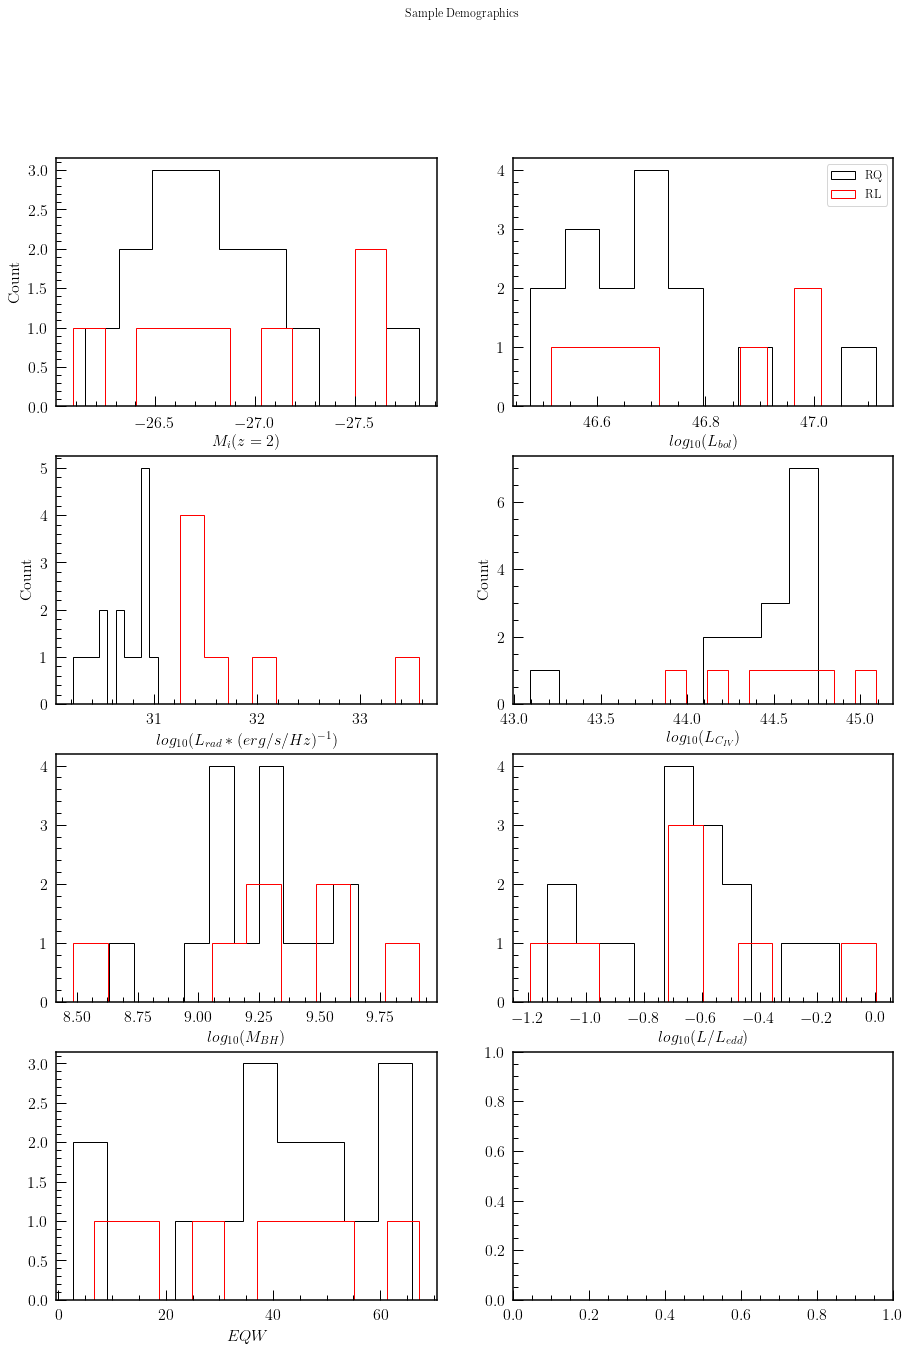

In [346]:
fig, axs = plt.subplots(4, 2, figsize=(15,21))

axs[0,0].hist(Miz2[RQ], color='k', histtype='step')
axs[0,0].hist(Miz2[RL], color='r', histtype='step')
axs[0,0].set_xlabel('$M_i(z=2)$')
axs[0,0].invert_xaxis()
axs[0,0].set_ylabel('Count')

axs[0,1].hist(logL_bol[RQ], color='k', histtype='step', label="RQ")
axs[0,1].hist(logL_bol[RL], color='r', histtype='step', label="RL")
axs[0,1].set_xlabel('$log_{10} (L_{bol})$')
axs[0,1].legend(loc="best")

axs[1,0].hist(logL_rad[RQ], color='k', histtype='step')
axs[1,0].hist(logL_rad[RL], color='r', histtype='step')
axs[1,0].set_xlabel('$log_{10} (L_{rad} * (erg/s/Hz)^{-1})$')
axs[1,0].set_ylabel('Count')

axs[1,1].hist(logL_civ[RQ], color='k', histtype='step')
axs[1,1].hist(logL_civ[RL], color='r', histtype='step')
axs[1,1].set_xlabel('$log_{10} (L_{C_{IV}})$')
axs[1,1].set_ylabel('Count')

axs[2,0].hist(log_bh[RQ], color='k', histtype='step')
axs[2,0].hist(log_bh[RL], color='r', histtype='step')
axs[2,0].set_xlabel('$log_{10} (M_{BH})$')

axs[2,1].hist(logedd_ratio[RQ], color='k', histtype='step')
axs[2,1].hist(logedd_ratio[RL], color='r', histtype='step')
axs[2,1].set_xlabel('$log_{10} (L / L_{edd})$')

axs[3,0].hist(ew_civ[RQ], color='k', histtype='step')
axs[3,0].hist(ew_civ[RL], color='r', histtype='step')
axs[3,0].set_xlabel('$EQW$')

plt.suptitle("Sample Demographics")
#plt.savefig("Graphs/demographics_RL_vs_RQ_flux.png")

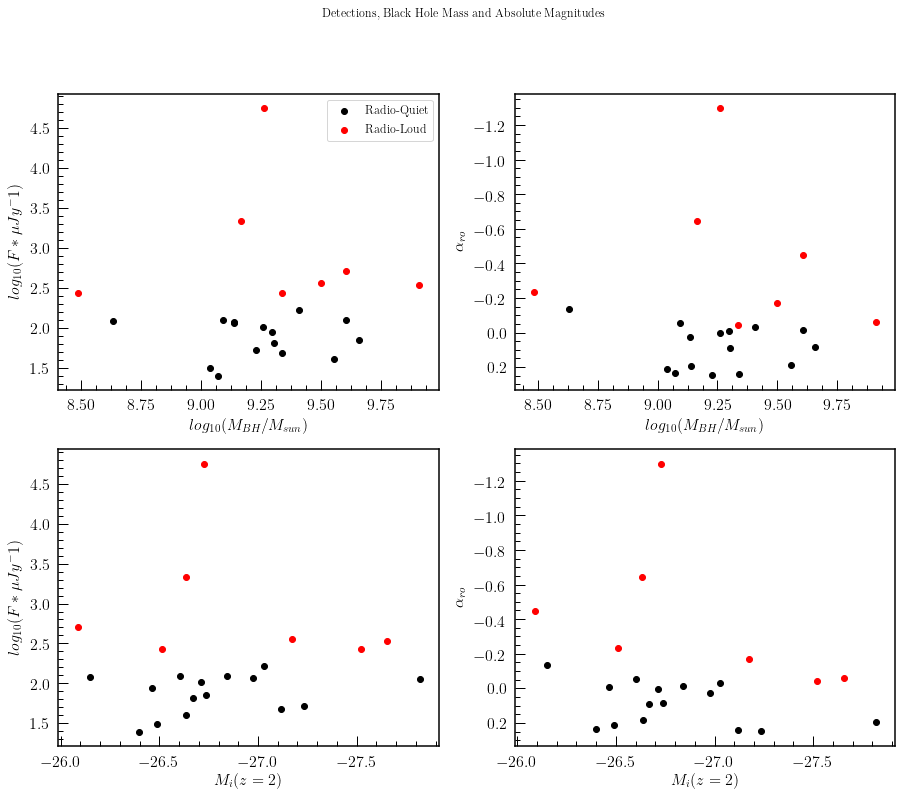

In [347]:
fig, axs = plt.subplots(2, 2, figsize=(15,12))

axs[0,0].scatter(log_bh[RQ], int_flux[RQ], color="black", label="Radio-Quiet")
axs[0,0].scatter(log_bh[RL], int_flux[RL], color="red", label="Radio-Loud")
#axs[0,0].set_ylim(1,3)
axs[0,0].set_xlabel("$log_{10} (M_{BH} / M_{sun})$")
axs[0,0].set_ylabel('$log_{10} (F * {\mu Jy}^-1)$')
axs[0,0].legend(loc="best")

axs[0,1].scatter(log_bh[RQ], aro[RQ], color="black")
axs[0,1].scatter(log_bh[RL], aro[RL], color="red")
axs[0,1].set_xlabel("$log_{10} (M_{BH} / M_{sun})$")
axs[0,1].set_ylabel('$\\alpha_{ro}$')
axs[0,1].invert_yaxis()

axs[1,0].scatter(Miz2[RQ], int_flux[RQ], color="black")
axs[1,0].scatter(Miz2[RL], int_flux[RL], color="red")
axs[1,0].set_xlabel("$M_i(z=2)$")
axs[1,0].set_ylabel('$log_{10} (F * {\mu Jy}^-1)$')
axs[1,0].invert_xaxis()

axs[1,1].scatter(Miz2[RQ], aro[RQ], color="black")
axs[1,1].scatter(Miz2[RL], aro[RL], color="red")
axs[1,1].set_xlabel("$M_i(z=2)$")
axs[1,1].set_ylabel('$\\alpha_{ro}$')
axs[1,1].invert_xaxis()
axs[1,1].invert_yaxis()

plt.suptitle("Detections, Black Hole Mass and Absolute Magnitudes")
#plt.savefig("Graphs/radio_vs_bhmass_and_mag_RL_vs_RQ_flux.png")

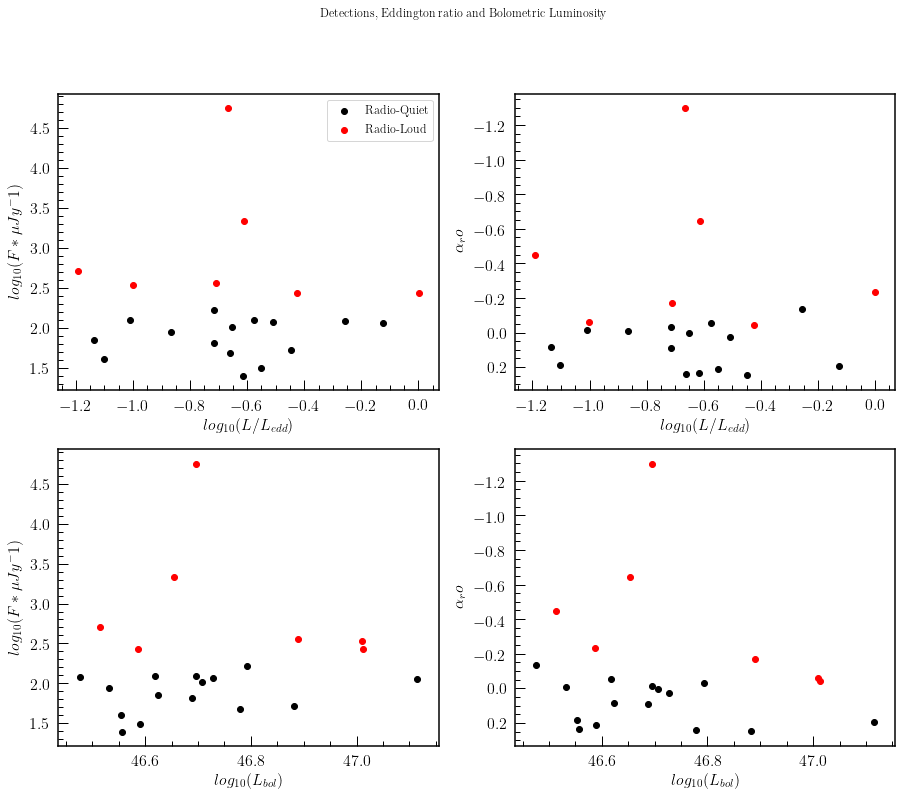

In [348]:
fig, axs = plt.subplots(2, 2, figsize=(15,12))

axs[0,0].scatter(logedd_ratio[RQ], int_flux[RQ], color="black", label="Radio-Quiet")
axs[0,0].scatter(logedd_ratio[RL], int_flux[RL], color="red", label="Radio-Loud")
axs[0,0].set_xlabel("$log_{10} (L / L_{edd})$")
axs[0,0].set_ylabel('$log_{10} (F * {\mu Jy}^-1)$')
axs[0,0].legend(loc="best")

axs[0,1].scatter(logedd_ratio[RQ], aro[RQ], color="black")
axs[0,1].scatter(logedd_ratio[RL], aro[RL], color="red")
axs[0,1].set_xlabel("$log_{10} (L / L_{edd})$")
axs[0,1].set_ylabel('$\\alpha_ro$')
axs[0,1].invert_yaxis()

axs[1,0].scatter(logL_bol[RQ], int_flux[RQ], color="black")
axs[1,0].scatter(logL_bol[RL], int_flux[RL], color="red")
axs[1,0].set_xlabel("$log_{10} (L_{bol})$")
axs[1,0].set_ylabel('$log_{10} (F * {\mu Jy}^-1)$')

axs[1,1].scatter(logL_bol[RQ], aro[RQ], color="black")
axs[1,1].scatter(logL_bol[RL], aro[RL], color="red")
axs[1,1].set_xlabel("$log_{10} (L_{bol})$")
axs[1,1].set_ylabel('$\\alpha_ro$')
axs[1,1].invert_yaxis()

plt.suptitle("Detections, Eddington ratio and Bolometric Luminosity")
plt.savefig("Graphs/radio_vs_eddratio_and_Lbol_RL_vs_RQ_flux.png")

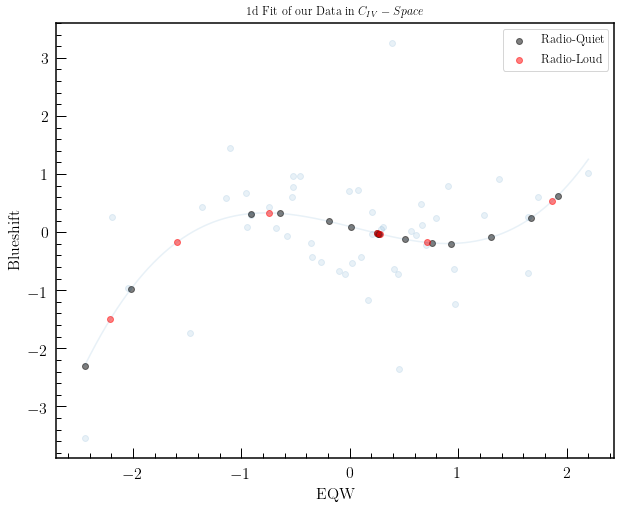

In [349]:
fill = 0.5
plt.figure(figsize=(10,8))
plt.scatter(x, y, alpha=0.1)
plt.scatter(fitx[RQ], fity[RQ], color='black', label="Radio-Quiet", alpha=fill)
plt.scatter(fitx[RL], fity[RL], color='red', label="Radio-Loud", alpha=fill)
plt.plot(z, fit(z), alpha=0.1)
plt.xlabel('EQW')
plt.ylabel('Blueshift')
plt.legend(loc="best")

plt.title("1d Fit of our Data in $C_{IV}-Space$")
plt.savefig("Graphs/civ_1dfit_RL_vs_RQ_flux.png")